In [1]:
# Calculate MPVs of energy losses of high-energy protons in thin Si 
# MPVs from PDG https://pdg.lbl.gov/2022/reviews/rpp2022-rev-passage-particles-matter.pdf Eq. 34.12
import numpy as np

def most_probable_energy_loss(proton_energy_GeV, thickness_um):
    # Constants
    # Values for Si from https://pdg.lbl.gov/2024/AtomicNuclearProperties/HTML/silicon_Si.html
    K = 0.307075  # MeV·cm²/g
    Z = 14     # Atomic number of Silicon
    A = 28.0855 # Atomic mass of Silicon
    rho = 2.329 # Density of Silicon g/cm³
    I = 0.173  # keV, Mean excitation energy
    I_MeV = I * 1e-3  # Convert I from keV to MeV
    z = 1 # charge of proton
    m_e = 0.511  # MeV, electron mass
    m_p = 938.27  # MeV/c², mass of proton
    
    # Convert thickness to cm
    thickness_cm = thickness_um * 1e-4
    
    # Convert proton energy to MeV
    proton_energy_MeV = proton_energy_GeV * 1e3
    
    # Calculate beta and gamma
    gamma = proton_energy_MeV / m_p
    beta_squared = 1 - 1 / (gamma ** 2)
    beta = np.sqrt(beta_squared)
    # Calculate xi
    xi = (K / 2) * (Z / A) * z**2 * (thickness_cm * rho / beta_squared)
    # print(f'beta: {beta:.5f}, gamma: {gamma:.2f}, beta*gammma: {beta*gamma:.2f}')
    
    # Calculate the most probable energy loss
    homega = np.sqrt(rho*Z/A) * 0.028816 # plasma energy keV
    delta = 2*(np.log(homega/I) + np.log(beta*gamma) - 0.5) # density correction factor
    term = (2 * m_e * beta_squared * gamma**2 * xi) / I_MeV**2
    ln_term = np.log(term)
    delta_p = xi * (ln_term + 0.2 - beta_squared - delta)
    
    # Convert energy loss to keV
    delta_p_keV = delta_p * 1e3
    
    return delta_p_keV

# Calculate MPV
proton_energy = 120  # GeV
thickness = 160      # micrometers

energy_loss = most_probable_energy_loss(proton_energy, thickness)
print(f"The most probable energy loss of a {proton_energy} GeV proton in {thickness} µm of silicon is {energy_loss:.2f} keV.")


The most probable energy loss of a 120 GeV proton in 160 µm of silicon is 43.13 keV.


In [2]:
# approximate MPVs from https://journals.aps.org/rmp/pdf/10.1103/RevModPhys.60.663 Table V 
# aplicable for beta*gamma > 100
def most_probable_energy_loss_bichsel(proton_energy_GeV, thickness_um):
    # Check the range of thickness and calculate dE accordingly
    if 110 < thickness_um < 3000:
        dE = thickness_um * (190 + 16.3 * np.log(thickness_um))/1000
        return dE
    elif 13 < thickness_um <= 110:
        dE = thickness_um * (100.6 + 35.35 * np.log(thickness_um))/1000
        return dE
    else:
        print(f'Thickness {thickness} um is out of the defined range for calculation.')

energy_loss = most_probable_energy_loss_bichsel(proton_energy, thickness)
print(f"The most probable energy loss of a {proton_energy} GeV proton in {thickness} µm of silicon is {energy_loss:.2f} keV.")


The most probable energy loss of a 120 GeV proton in 160 µm of silicon is 43.64 keV.


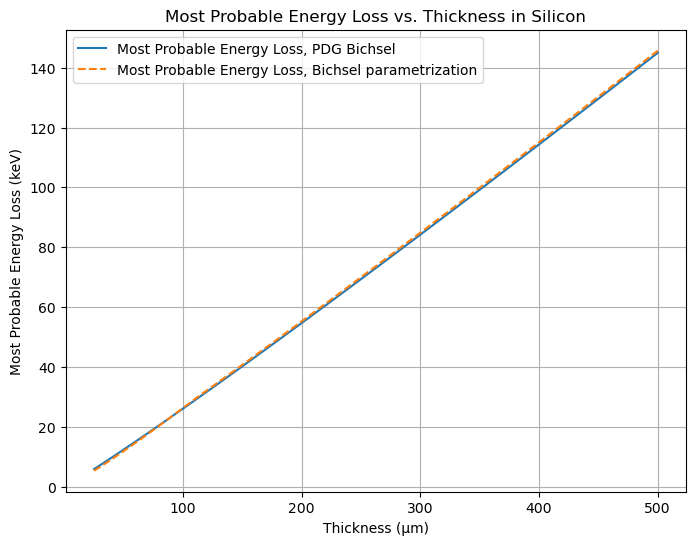

In [3]:
import matplotlib.pyplot as plt
thicknesses = np.linspace(25, 500, 100)  # Thickness range from 25 to 500 micrometers

# Calculate energy loss for each thickness
energy_losses = []
energy_losses_bichsel = []
for thickness in thicknesses:
    dE = most_probable_energy_loss(proton_energy, thickness)
    if dE is not None:
        energy_losses.append(dE)
    dE_bichsel = most_probable_energy_loss_bichsel(proton_energy, thickness)
    if dE_bichsel is not None:
        energy_losses_bichsel.append(dE_bichsel)
    
# Plotting
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(thicknesses, energy_losses, label='Most Probable Energy Loss, PDG Bichsel')
plt.plot(thicknesses, energy_losses_bichsel, label='Most Probable Energy Loss, Bichsel parametrization', linestyle='--')
plt.xlabel('Thickness (µm)')
plt.ylabel('Most Probable Energy Loss (keV)')
plt.title('Most Probable Energy Loss vs. Thickness in Silicon')
plt.grid(True)
plt.legend()
plt.show()